In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_pickle('saved_df.pkl')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [33]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



In [35]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y)

In [36]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [37]:
y_pred = dt_model.predict(X_test)

In [38]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        94
           1       0.59      0.62      0.61        48

    accuracy                           0.73       142
   macro avg       0.70      0.70      0.70       142
weighted avg       0.73      0.73      0.73       142



# Random Forest

In [8]:
rf_model= RandomForestClassifier().fit(X_train, y_train)

In [9]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        94
           1       0.68      0.58      0.63        48

    accuracy                           0.77       142
   macro avg       0.74      0.72      0.73       142
weighted avg       0.76      0.77      0.76       142



## RF Tuning

In [41]:
rf= RandomForestClassifier()

In [42]:
rf_params={"n_estimators":[50,100,300],
           "max_depth":[3,5,7],
           "max_features":[2,4,6,8],
           "min_samples_split":[2,4,6]    
}

In [43]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   31.2s finished


In [44]:
rf_tuned= RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, min_samples_split=4).fit(X_train, y_train)

In [45]:
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83 11]
 [23 25]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



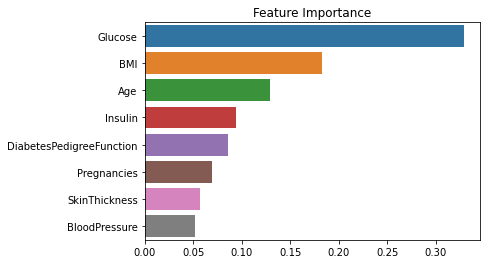

In [46]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

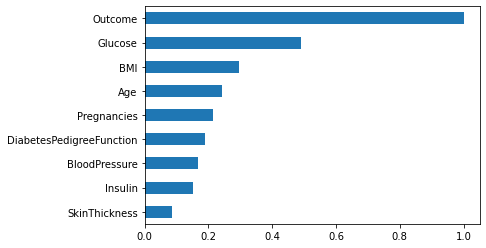

In [53]:
df.corr()["Outcome"].sort_values().plot.barh();

# XGBOOST

In [2]:
!pip install xgboost

In [10]:
from xgboost import XGBClassifier

In [16]:
xgb_model=XGBClassifier().fit(X_train, y_train)

In [17]:
y_pred= xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76 18]
 [23 25]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



## Tuning XGBoost

In [71]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}
xgb_model = XGBClassifier().fit(X_train, y_train)

KeyboardInterrupt: 

In [59]:
xgb=XGBClassifier()

In [60]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 390 out of 405 | elapsed:    9.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    9.4s finished


In [61]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    2.8s finished


In [62]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

In [66]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 3,
                                n_estimators= 500,
                                subsample= 0.8).fit(X_train, y_train)

In [68]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 3,
                                n_estimators= 100,
                                subsample=1).fit(X_train, y_train)

In [69]:
y_pred = xgb_cv_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75 19]
 [24 24]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        94
           1       0.56      0.50      0.53        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.69       142



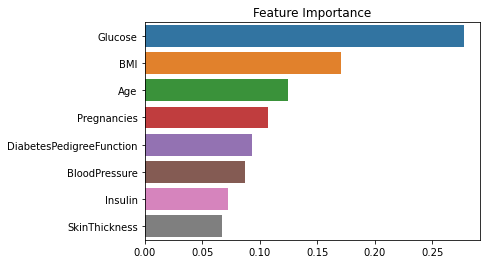

In [70]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()